In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller as ADF
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Import Data
data = pd.read_excel("Data_1.xlsx") 
date = data.Period.apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
data = data.set_index(date[:]) 
df = data.iloc[:-2,:]
df.tail()

,Period,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries *,Services Producing Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,Business Services,Other Services Industries,Ownership Of Dwellings,Add: Taxes On Products,Gross Value Added At Basic Prices
Period,,,,,,,,,,,,,,,,,,
2018-10-01,20181001,131359.4,34480.1,28628.8,4390.0,1423.4,37.9,86369.6,22622.0,8141.5,2516.2,5166.3,15988.1,17930.1,14005.4,4510.9,5998.8,125360.6
2019-01-01,20190101,125745.4,31413.5,25482.6,4461.1,1434.8,35.0,83690.9,19861.6,7570.2,2491.7,5000.1,16395.2,17609.6,14762.5,4461.2,6179.8,119565.6
2019-04-01,20190401,125250.6,30958.9,25134.5,4269.5,1520.0,34.9,83036.4,20624.8,7958.1,2446.2,5248.9,16595.1,17689.3,12474.0,4562.3,6693.0,118557.6
2019-07-01,20190701,127910.5,32894.3,26921.0,4399.2,1532.2,41.9,83959.8,20833.8,7993.8,2654.3,5085.2,16478.3,17727.0,13187.4,4644.0,6412.4,121498.1
2019-10-01,20191001,128661.2,29195.4,22973.1,4659.5,1524.0,38.8,88154.1,21858.3,8619.8,2644.9,5428.8,17252.1,18450.2,13900.0,4694.9,6616.8,122044.4


In [53]:
data.head()

,Period,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries *,Services Producing Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,Business Services,Other Services Industries,Ownership Of Dwellings,Add: Taxes On Products,Gross Value Added At Basic Prices
Period,,,,,,,,,,,,,,,,,,
1975-01-01,19750101,3209.4,1014.2,654.9,228.5,61.3,69.5,1991.7,672.8,291.2,112.4,69.8,248.9,268.5,328.1,81.2,122.3,3087.1
1975-04-01,19750401,3307.0,1090.9,692.9,256.3,71.2,70.5,2019.6,704.9,303.2,110.7,65.5,235.6,275.6,324.1,83.5,113.0,3194.0
1975-07-01,19750701,3519.3,1205.7,785.1,272.6,73.5,74.5,2105.2,716.0,331.6,116.6,65.9,242.0,288.4,344.7,86.0,122.4,3396.9
1975-10-01,19751001,3693.0,1269.6,810.1,294.9,83.2,81.4,2206.6,724.8,335.6,123.4,72.8,261.2,286.4,402.4,86.7,130.1,3562.9
1976-01-01,19760101,3545.1,1166.6,744.8,271.7,73.4,76.7,2154.2,677.5,364.0,125.1,71.2,270.3,289.0,357.1,88.6,135.7,3409.4


In [4]:
# Drop subtotals columns
df = df.drop(columns = ["Period",
                        "Goods Producing Industries",
                        "Services Producing Industries",
                        "Gross Value Added At Basic Prices"], axis = 1) 

# Rank Top Industrial Sectors
df.iloc[:,1:].sum().sort_values(ascending = False) 

Manufacturing                    1693475.8
Wholesale & Retail Trade         1259614.8
Business Services                 995202.6
Finance & Insurance               884565.4
Other Services Industries         802664.0
Transportation & Storage          632465.1
Add: Taxes On Products            432069.2
Construction                      366040.1
Ownership Of Dwellings            293883.9
Information & Communications      286231.5
Accommodation & Food Services     175834.9
Utilities                         120437.0
Other Goods Industries *            9506.2
dtype: float64

In [5]:
# Extract the top 4 industry
df = df[["GDP At Current Market Prices","Manufacturing","Wholesale & Retail Trade","Business Services","Finance & Insurance"] ]
df.tail()

,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,
2018-10-01,131359.4,28628.8,22622.0,17930.1,15988.1
2019-01-01,125745.4,25482.6,19861.6,17609.6,16395.2
2019-04-01,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,128661.2,22973.1,21858.3,18450.2,17252.1


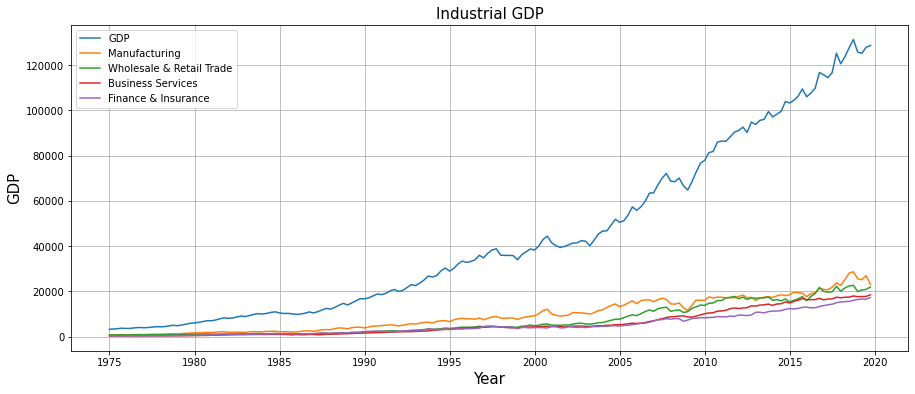

In [6]:
# Visualize the Data
plt.figure(figsize = (15,6))
plt.plot(df.index, df.iloc[:,0], label = "GDP")
plt.plot(df.index, df.iloc[:,1], label = "Manufacturing")
plt.plot(df.index, df.iloc[:,2], label = "Wholesale & Retail Trade")
plt.plot(df.index, df.iloc[:,3], label = "Business Services")
plt.plot(df.index, df.iloc[:,4], label = "Finance & Insurance")
plt.title("Industrial GDP", fontsize = 15)
plt.legend()
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.grid()

In [7]:
#Log all the data and create new columns
df.insert(0, 'Log_GDP', df['GDP At Current Market Prices'].apply(np.log))
df.insert(0, 'Log_F', df['Finance & Insurance'].apply(np.log))
df.insert(0, 'Log_B', df['Business Services'].apply(np.log))
df.insert(0, 'Log_W', df['Wholesale & Retail Trade'].apply(np.log))
df.insert(0, 'Log_M', df['Manufacturing'].apply(np.log))
df.tail()

,Log_M,Log_W,Log_B,Log_F,Log_GDP,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,,,,,,
2018-10-01,10.262168,10.026678,9.794236,9.679600,11.785692,131359.4,28628.8,22622.0,17930.1,15988.1
2019-01-01,10.145751,9.896543,9.776199,9.704744,11.742015,125745.4,25482.6,19861.6,17609.6,16395.2
2019-04-01,10.131997,9.934250,9.780715,9.716863,11.738072,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,10.200662,9.944332,9.782844,9.709800,11.759086,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,10.042079,9.992336,9.822830,9.755689,11.764938,128661.2,22973.1,21858.3,18450.2,17252.1


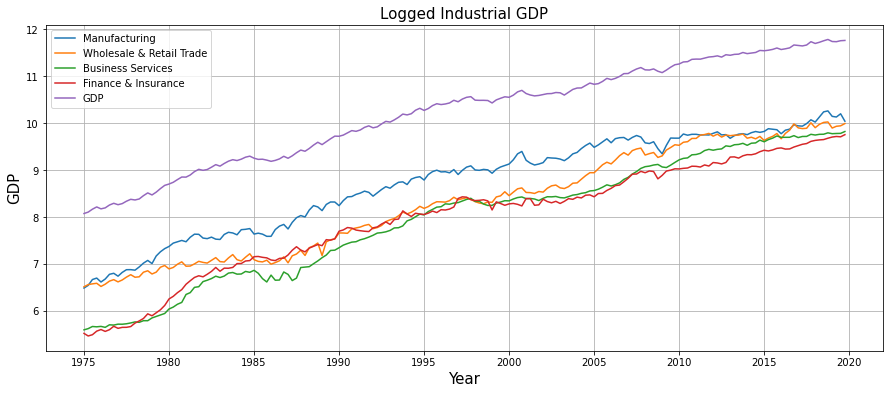

In [8]:
# Visualize the Logged Data
plt.figure(figsize = (15,6))
plt.plot(df.iloc[:,0], label = "Manufacturing")
plt.plot(df.iloc[:,1], label = "Wholesale & Retail Trade")
plt.plot(df.iloc[:,2], label = "Business Services")
plt.plot(df.iloc[:,3], label = "Finance & Insurance")
plt.plot(df.iloc[:,4], label = "GDP")
plt.title("Logged Industrial GDP", fontsize = 15)
plt.legend()
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.grid()

## Season-decompose

In [10]:
# Decompose Manufacturing Sector and extract the trend
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result_M = seasonal_decompose(df['Log_M'], freq = 4)
decompose_result_W = seasonal_decompose(df['Log_W'], freq = 4)
decompose_result_B = seasonal_decompose(df['Log_B'], freq = 4)
decompose_result_F = seasonal_decompose(df['Log_F'], freq = 4)
#decompose_result_GDP = seasonal_decompose(df['Log_GDP'], freq = 4)

df_trend_M = decompose_result_M.trend.dropna()
df_trend_W = decompose_result_W.trend.dropna()
df_trend_B = decompose_result_B.trend.dropna()
df_trend_F = decompose_result_F.trend.dropna()
#df_trend_GDP = decompose_result_GDP.trend.dropna()

In [11]:
df_trend = pd.concat([df_trend_M, df_trend_W, df_trend_B, df_trend_F], axis =1) # , df_trend_GDP
df_trend.columns = ["Log_M", "Log_W", "Log_B", "Log_F"] #"Log_GDP"]
df_trend

,Log_M,Log_W,Log_B,Log_F
Period,,,,
1975-07-01,6.613163,6.558140,5.642582,5.518663
1975-10-01,6.646204,6.560087,5.655179,5.541147
1976-01-01,6.677117,6.568504,5.663050,5.566728
1976-04-01,6.703791,6.585530,5.672189,5.593124
1976-07-01,6.732085,6.607390,5.682812,5.609308
...,...,...,...,...
2018-04-01,10.141644,9.978430,9.763365,9.643313
2018-07-01,10.180559,9.979737,9.770860,9.660670
2018-10-01,10.195575,9.973626,9.776683,9.678780


## Check for Stationarity and Make the Time Series Stationary

In [12]:
# Since the VAR model requires the time series to be stationary, 
# it is customary to check all the time series in the system for stationarity.
# ADF test is the most popular test for stationarity.

In [13]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = ADF(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [14]:
# ADF Test on each column
for name, column in df_trend.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Log_M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7075
 No. Lags Chosen       = 14
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0728. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Log_W" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6478
 No. Lags Chosen       = 10
 Critical value 1%     = -3.471
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.8598. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Log_B" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [ ]:
# If a series is found to be non-stationary, we can make it stationary by differencing 
# The series once and repeat the test again until it becomes stationary.

In [16]:
# 1st difference
data_differenced = df_trend.diff().dropna()
data_differenced_w=data_differenced[["Log_W","Log_F"]]
data_differenced_w

,Log_W,Log_F
Period,,
1975-10-01,0.001947,0.022484
1976-01-01,0.008417,0.025581
1976-04-01,0.017026,0.026396
1976-07-01,0.021860,0.016184
1976-10-01,0.023366,0.013980
...,...,...
2018-04-01,0.017844,0.018974
2018-07-01,0.001307,0.017357
2018-10-01,-0.006111,0.018111


In [17]:
# ADF Test on each column
for name, column in data_differenced_w.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Log_W" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5776
 No. Lags Chosen       = 9
 Critical value 1%     = -3.471
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0062. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Log_F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9573
 No. Lags Chosen       = 13
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0391. Rejecting Null Hypothesis.
 => Series is Stationary.




In [18]:
#Split dataset
nobs = 18
data_train, data_test = data_differenced_w[0:-nobs], data_differenced_w[-nobs:]

# Check size
print(data_train.shape)  # (157, 5)
print(data_test.shape)  # (18, 5)

(157, 2)
(18, 2)


## Select the Order (P) of VAR model

In [19]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR
# model and pick the order that gives a model with least AIC
from statsmodels.tsa.api import VAR
model = VAR(data_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic) #lag 2

Lag Order = 1
AIC :  -17.878864121346894
Lag Order = 2
AIC :  -18.378107489575275
Lag Order = 3
AIC :  -18.373737542871392
Lag Order = 4
AIC :  -18.363691624195134
Lag Order = 5
AIC :  -18.648208619844937
Lag Order = 6
AIC :  -18.783369209837343
Lag Order = 7
AIC :  -18.7506333708306
Lag Order = 8
AIC :  -18.70983670545105
Lag Order = 9
AIC :  -18.864682501589375
Lag Order = 10
AIC :  -18.892142333117558
Lag Order = 11
AIC :  -18.85230021116701
Lag Order = 12
AIC :  -18.83525882979888


## Train the VAR Model of Selected Order(p)


In [20]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Dec, 2020
Time:                     14:42:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -18.1818
Nobs:                     155.000    HQIC:                  -18.2984
Log likelihood:           994.432    FPE:                1.04354e-08
AIC:                     -18.3781    Det(Omega_mle):     9.79337e-09
--------------------------------------------------------------------
Results for equation Log_W
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.004369         0.001194            3.659           0.000
L1.Log_W         1.345104         0.071645           18.775           0.000
L1.Log_F        -0.042622         0.062195           -0.685           0.493
L2.L

### From our regression results, the predictive model for the wholesale and retail sales sector is as follows:


$$
\hat{LogW}_t = 1.345 LogW_{t-1}  -0.523 LogW_{t-2} 
$$



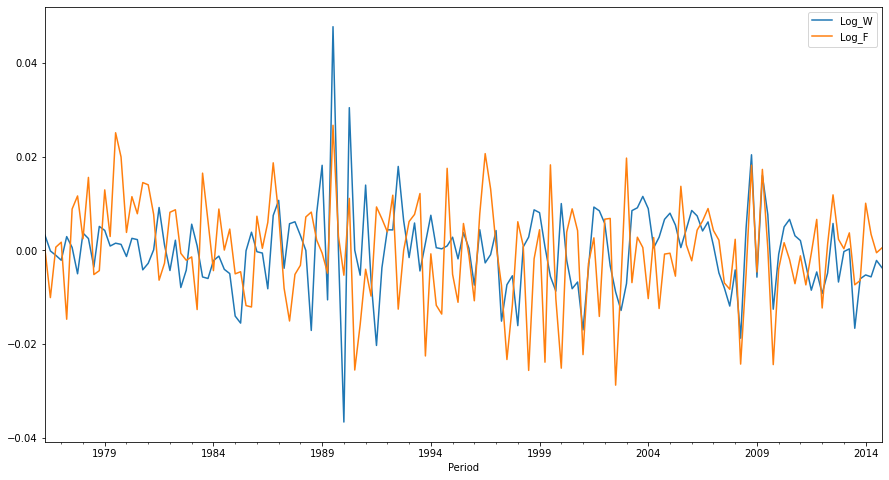

In [21]:
model_fitted.resid.plot(figsize =(15,8))

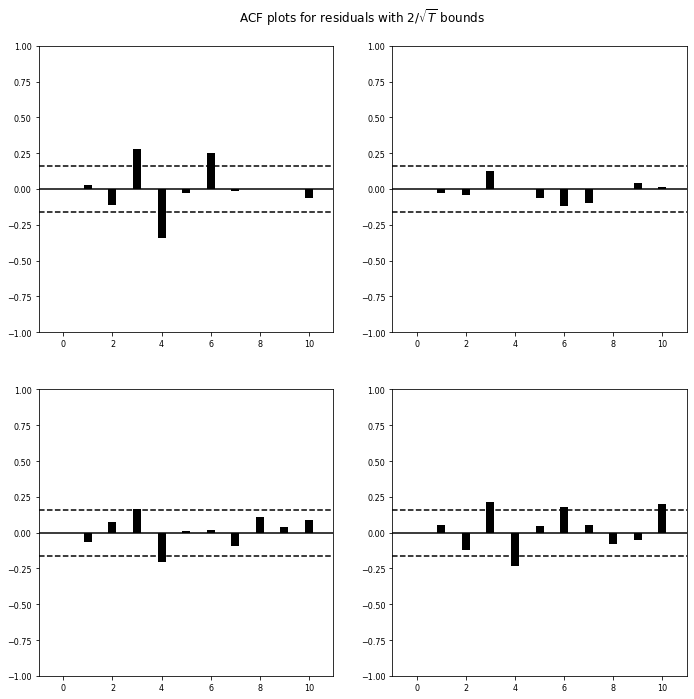

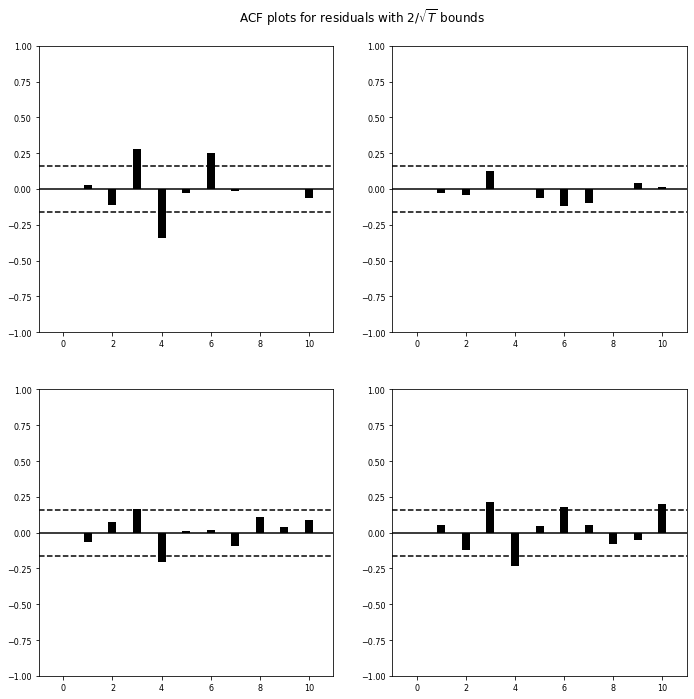

In [22]:
model_fitted.plot_acorr()

## Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [23]:
# The value of this statistic can vary between 0 and 4. The closer it is to the value 2,
# Then there is no significant serial correlation. The closer to 0, there is a positive 
# Serial correlation, and the closer it is to 4 implies negative serial correlation.

In [24]:
def adjust(val, length= 6): 
    return str(val).ljust(length)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(adjust(col), ':', round(val, 2))

Period : 1.94
GDP At Current Market Prices : 1.89


## Forecast VAR model using statsmodels

In [25]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #= 2

# Input data for forecasting
forecast_input = data_differenced_w.values[-lag_order:]
forecast_input

2


array([[-0.01416139,  0.01655501],
       [-0.01330642,  0.01692723]])

In [26]:
# Forecast for the next 18 period
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
data_forecast = pd.DataFrame(fc, columns=data_differenced_w.columns)  #+ '_1d'

In [27]:
fc

array([[-0.00671264,  0.016704  ],
       [ 0.00172238,  0.01667075],
       [ 0.00962146,  0.01724506],
       [ 0.0158129 ,  0.01845109],
       [ 0.01996561,  0.02006016],
       [ 0.02225659,  0.02175773],
       [ 0.0231085 ,  0.02326812],
       [ 0.02300653,  0.02441796],
       [ 0.02238751,  0.02514731],
       [ 0.02158652,  0.02548763],
       [ 0.02082417,  0.02552598],
       [ 0.02021855,  0.02536979],
       [ 0.01980937,  0.02512001],
       [ 0.0195849 ,  0.02485539],
       [ 0.01950606,  0.02462681],
       [ 0.0195249 ,  0.02445903],
       [ 0.01959672,  0.02435646],
       [ 0.01968648,  0.02431044]])

In [28]:
df_trend[["Log_W","Log_F"]].iloc[-19:-18]

,Log_W,Log_F
Period,,
2014-10-01,9.677181,9.382529


In [29]:
# invert prediction result to logged GDP trend
abc = df_trend[["Log_W","Log_F"]].iloc[-17:-16]#extract actual data as base to invert forecasted value
prediction = pd.concat([abc,data_forecast]).cumsum()[1:]

d = ['2015-01-01','2015-04-01','2015-07-01','2015-10-01',
     '2016-01-01','2016-04-01','2016-07-01','2016-10-01',
     '2017-01-01','2017-04-01','2017-07-01','2017-10-01',
     '2018-01-01','2018-04-01','2018-07-01','2018-10-01',
     '2019-01-01','2019-04-01']
d =pd.to_datetime(d, format = '%Y-%m-%d')

prediction.set_index(d,inplace=True)
prediction

,Log_W,Log_F
2015-01-01,9.688979,9.438626
2015-04-01,9.690702,9.455297
2015-07-01,9.700323,9.472542
2015-10-01,9.716136,9.490993
2016-01-01,9.736102,9.511053
2016-04-01,9.758358,9.532811
2016-07-01,9.781467,9.556079
2016-10-01,9.804473,9.580497
2017-01-01,9.826861,9.605645
2017-04-01,9.848447,9.631132


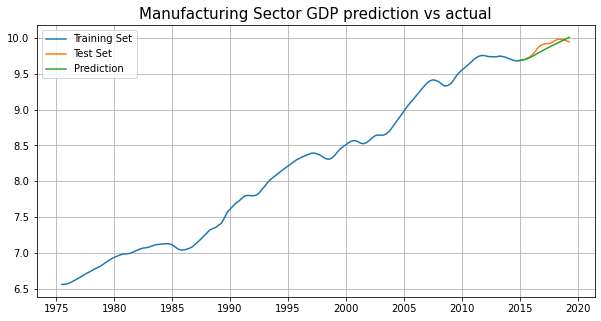

In [30]:
#plot prediction vs test set data
plt.figure(figsize = (10,5))
plt.plot(df_trend[:-16]["Log_W"], label="Training Set")
plt.plot(df_trend[-16:]["Log_W"], label="Test Set")
plt.plot(prediction["Log_W"], label="Prediction")

plt.title("Manufacturing Sector GDP prediction vs actual", fontsize = "15")

plt.grid()
plt.legend()
plt.show()

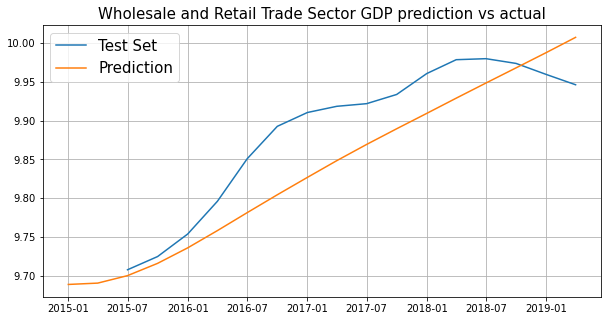

In [31]:
#plot prediction vs test set data
plt.figure(figsize = (10,5))
plt.plot(df_trend[-16:]["Log_W"], label="Test Set")
plt.plot(prediction["Log_W"], label="Prediction")

plt.title("Wholesale and Retail Trade Sector GDP prediction vs actual", fontsize = "15")

plt.grid()
plt.legend(fontsize='15')
plt.show()

## Prediction for 2020 and 2022

In [32]:
data_t = data[["GDP At Current Market Prices","Manufacturing","Wholesale & Retail Trade","Business Services","Finance & Insurance"] ]
data_t

,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,
1975-01-01,3209.4,654.9,672.8,268.5,248.9
1975-04-01,3307.0,692.9,704.9,275.6,235.6
1975-07-01,3519.3,785.1,716.0,288.4,242.0
1975-10-01,3693.0,810.1,724.8,286.4,261.2
1976-01-01,3545.1,744.8,677.5,289.0,270.3
...,...,...,...,...,...
2019-04-01,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,128661.2,22973.1,21858.3,18450.2,17252.1


In [33]:
#data_t.insert(0, 'Log_GDP', data['GDP At Current Market Prices'].apply(np.log))
data_t.insert(0, 'Log_F', data['Finance & Insurance'].apply(np.log))
data_t.insert(0, 'Log_B', data['Business Services'].apply(np.log))
data_t.insert(0, 'Log_W', data['Wholesale & Retail Trade'].apply(np.log))
data_t.insert(0, 'Log_M', data['Manufacturing'].apply(np.log))
data_t

,Log_M,Log_W,Log_B,Log_F,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,,,,,
1975-01-01,6.484483,6.511448,5.592851,5.517051,3209.4,654.9,672.8,268.5,248.9
1975-04-01,6.540886,6.558056,5.618951,5.462135,3307.0,692.9,704.9,275.6,235.6
1975-07-01,6.665811,6.573680,5.664348,5.488938,3519.3,785.1,716.0,288.4,242.0
1975-10-01,6.697158,6.585896,5.657389,5.565286,3693.0,810.1,724.8,286.4,261.2
1976-01-01,6.613116,6.518410,5.666427,5.599532,3545.1,744.8,677.5,289.0,270.3
...,...,...,...,...,...,...,...,...,...
2019-04-01,10.131997,9.934250,9.780715,9.716863,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,10.200662,9.944332,9.782844,9.709800,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,10.042079,9.992336,9.822830,9.755689,128661.2,22973.1,21858.3,18450.2,17252.1


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result_M = seasonal_decompose(data_t['Log_M'],freq=4)
decompose_result_W = seasonal_decompose(data_t['Log_W'],freq=4)
decompose_result_B = seasonal_decompose(data_t['Log_B'],freq=4)
decompose_result_F = seasonal_decompose(data_t['Log_F'],freq=4)
#decompose_result_GDP = seasonal_decompose(data_t['Log_GDP'],freq=4)

data_trend_M = decompose_result_M.trend.dropna()
data_trend_W = decompose_result_W.trend.dropna()
data_trend_B = decompose_result_B.trend.dropna()
data_trend_F = decompose_result_F.trend.dropna()
#data_trend_GDP = decompose_result_GDP.trend.dropna()

In [35]:
data_trend_t = pd.concat([data_trend_M, data_trend_W, data_trend_B, data_trend_F], axis =1) # , data_trend_GDP
data_trend_t.columns = ["Log_M", "Log_W", "Log_B", "Log_F"] #, "Log_GDP"
data_trend_t

,Log_M,Log_W,Log_B,Log_F
Period,,,,
1975-07-01,6.613163,6.558140,5.642582,5.518663
1975-10-01,6.646204,6.560087,5.655179,5.541147
1976-01-01,6.677117,6.568504,5.663050,5.566728
1976-04-01,6.703791,6.585530,5.672189,5.593124
1976-07-01,6.732085,6.607390,5.682812,5.609308
...,...,...,...,...
2018-10-01,10.195575,9.973626,9.776683,9.678780
2019-01-01,10.190262,9.959464,9.781215,9.695335
2019-04-01,10.157633,9.946158,9.787073,9.712263


In [36]:
data_differenced_t = data_trend_t.diff().dropna()
data_differenced_t

,Log_M,Log_W,Log_B,Log_F
Period,,,,
1975-10-01,0.033041,0.001947,0.012597,0.022484
1976-01-01,0.030913,0.008417,0.007870,0.025581
1976-04-01,0.026674,0.017026,0.009139,0.026396
1976-07-01,0.028294,0.021860,0.010624,0.016184
1976-10-01,0.033213,0.023366,0.014278,0.013980
...,...,...,...,...
2018-10-01,0.015016,-0.006111,0.005822,0.018111
2019-01-01,-0.005313,-0.014161,0.004532,0.016555
2019-04-01,-0.032628,-0.013306,0.005859,0.016927


In [37]:
Ware_t = data_differenced_t[["Log_W","Log_F"]]
Ware_t

,Log_W,Log_F
Period,,
1975-10-01,0.001947,0.022484
1976-01-01,0.008417,0.025581
1976-04-01,0.017026,0.026396
1976-07-01,0.021860,0.016184
1976-10-01,0.023366,0.013980
...,...,...
2018-10-01,-0.006111,0.018111
2019-01-01,-0.014161,0.016555
2019-04-01,-0.013306,0.016927


In [38]:
model = VAR(Ware_t)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)  #3

Lag Order = 1
AIC :  -17.943056077416433
Lag Order = 2
AIC :  -18.45412180101279
Lag Order = 3
AIC :  -18.46027847142485
Lag Order = 4
AIC :  -18.451446195897343
Lag Order = 5
AIC :  -18.70488749524315
Lag Order = 6
AIC :  -18.89757089693407
Lag Order = 7
AIC :  -18.87278850949595
Lag Order = 8
AIC :  -18.830228773301652
Lag Order = 9
AIC :  -18.971687766905493
Lag Order = 10
AIC :  -19.025883153454387
Lag Order = 11
AIC :  -18.98965170582557
Lag Order = 12
AIC :  -18.97816832841563


In [39]:
model_fitted_t = model.fit(6)

In [40]:
print(model_fitted_t.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Dec, 2020
Time:                     14:42:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -18.4199
Nobs:                     171.000    HQIC:                  -18.7037
Log likelihood:           1156.47    FPE:                6.21076e-09
AIC:                     -18.8976    Det(Omega_mle):     5.36415e-09
--------------------------------------------------------------------
Results for equation Log_W
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.003309         0.001212            2.730           0.006
L1.Log_W         1.651653         0.076183           21.680           0.000
L1.Log_F        -0.107082         0.066202           -1.618           0.106
L2.L

### From our regression results, our predictive models for the wholesale industries are as follows:


$$
\hat{LogW}_t = 1.652 LogW_{t-1} -1.159 LogW_{t-2} +0.842 LogW_{t-3} -1.110 LogW_{t-4} +1.076 LogW_{t-5} -0.436 LogW_{t-6} -0.286 LogF_{t-5} + 0.159 LogF_{t-6} 
$$

In [41]:
# Get the lag order
lag_order = model_fitted_t.k_ar
print(lag_order)  #= 3

6


In [42]:
# Input data for forecasting
forecast_input_t = Ware_t.values[-lag_order:]
forecast_input_t

array([[ 0.00130699,  0.01735664],
       [-0.00611071,  0.01811058],
       [-0.01416139,  0.01655501],
       [-0.01330642,  0.01692723],
       [-0.01659344,  0.0197642 ],
       [-0.04223321,  0.01077546]])

In [43]:
# Forecast for the next 12 period
fc_t = model_fitted_t.forecast(y=forecast_input_t, steps =12 )

In [44]:
data_forecast_t = pd.DataFrame(fc_t,  columns=Ware_t.columns)  #+ '_1d'

In [54]:
data_forecast_t

,Log_W,Log_F
0,-0.049674,0.004804
1,-0.042275,-0.000059
2,-0.033808,-0.006317
3,-0.011719,-0.000369
4,0.004270,0.006527
5,0.008007,0.009860
6,0.015233,0.015773
7,0.018577,0.015292
8,0.020337,0.013253
9,0.027568,0.016606


In [45]:
abc = data_trend_t.iloc[-1:,:]
abc

,Log_M,Log_W,Log_B,Log_F
Period,,,,
2019-10-01,10.11423,9.887331,9.752736,9.742802


In [47]:
# invert prediction result to logged GDP trend
abc = data_trend_t.iloc[-1:,1] #extract actual data as base to invert forecasted value
prediction_t = pd.concat([abc,data_forecast_t.Log_W]).cumsum()[1:]
prediction_t = pd.DataFrame(prediction_t, columns =["Log_W"])
prediction_t

,Log_W
0,9.837657
1,9.795382
2,9.761575
3,9.749855
4,9.754126
5,9.762133
6,9.777365
7,9.795942
8,9.816279
9,9.843847


In [48]:
d = ['2020-01-01','2020-04-01','2020-07-01','2020-10-01',
     '2021-01-01','2021-04-01','2021-07-01','2021-10-01',
     '2022-01-01','2022-04-01','2022-07-01','2022-10-01',]
d =pd.to_datetime(d, format = '%Y-%m-%d')

In [49]:
prediction_t.set_index(d,inplace=True)
prediction_t

,Log_W
2020-01-01,9.837657
2020-04-01,9.795382
2020-07-01,9.761575
2020-10-01,9.749855
2021-01-01,9.754126
2021-04-01,9.762133
2021-07-01,9.777365
2021-10-01,9.795942
2022-01-01,9.816279
2022-04-01,9.843847


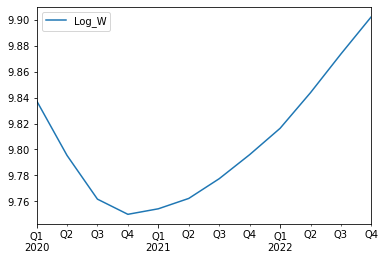

In [50]:
prediction_t.plot()

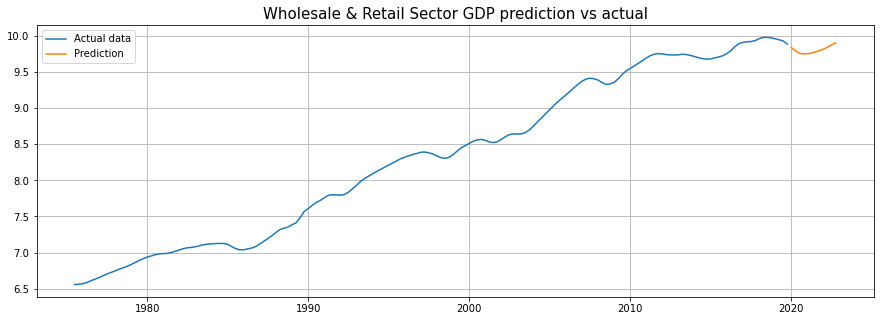

In [51]:
#plot prediction vs test set data
plt.figure(figsize = (15,5))
plt.plot(data_trend_t["Log_W"], label="Actual data")
plt.plot(prediction_t["Log_W"], label="Prediction")

plt.title("Wholesale & Retail Sector GDP prediction vs actual", fontsize = "15")

plt.grid()
plt.legend()
plt.show()

In [52]:
#summarize prediction result into dataframe
total= pd.concat([np.exp(data_trend_t.iloc[-1:,1:]),np.exp(prediction_t)],axis=0)
growth = total.pct_change().iloc[1:,0:1]
growth.columns=['Growth Rate of prediction']
growth

,Growth Rate of prediction
2020-01-01,-0.048460
2020-04-01,-0.041394
2020-07-01,-0.033242
2020-10-01,-0.011651
2021-01-01,0.004280
2021-04-01,0.008039
2021-07-01,0.015349
2021-10-01,0.018750
2022-01-01,0.020545
2022-04-01,0.027951


## Thanks!